In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Question 1

### 1. Reading both SAP CSV and SPY CSV.

In [3]:
df_SAP = pd.read_csv('SAP.csv')
df_SPY = pd.read_csv('SPY.csv')

In [4]:
df_SAP["True Label"] = np.where(df_SAP["Return"] >= 0, "+","-")

In [5]:
df_SPY["True Label"] = np.where(df_SPY["Return"] >= 0, "+","-")

#### * True Label column added to SAP ticker

In [6]:
df_SAP.head(4)

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA,True Label
0,2016-01-04,2016,1,4,Monday,1,2016-01,76.74,77.18,75.89,77.14,1075400.0,70.56,0.000000,70.560000,70.560000,+
1,2016-01-05,2016,1,5,Tuesday,1,2016-01,76.33,77.10,76.16,76.97,1392000.0,70.40,-0.002204,70.480000,70.480000,-
2,2016-01-06,2016,1,6,Wednesday,1,2016-01,76.81,77.79,76.66,77.65,1031600.0,71.03,0.008835,70.663333,70.663333,+
3,2016-01-07,2016,1,7,Thursday,1,2016-01,76.90,77.97,76.68,77.21,1670200.0,70.62,-0.005666,70.652500,70.652500,-


#### * True Label column added to SPY ticker

In [7]:
df_SPY.head(4)

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA,True Label
0,2016-01-04,2016,1,4,Monday,1,2016-01,200.49,201.03,198.59,201.02,222353500.0,182.51,0.000000,182.510,182.510,+
1,2016-01-05,2016,1,5,Tuesday,1,2016-01,201.40,201.90,200.05,201.36,110845800.0,182.82,0.001691,182.665,182.665,+
2,2016-01-06,2016,1,6,Wednesday,1,2016-01,198.34,200.06,197.60,198.82,152112600.0,180.52,-0.012614,181.950,181.950,-
3,2016-01-07,2016,1,7,Thursday,1,2016-01,195.33,197.44,193.59,194.05,213436100.0,176.19,-0.023991,180.510,180.510,-


### 2. Taking years 1,2 and 3 data

#### Total Trading days for both ticker

In [8]:
sap_L = len(df_SAP[df_SAP["Date"] < "2019-01-01"])
sap_L

754

In [9]:
spy_L = len(df_SPY[df_SPY["Date"] < "2019-01-01"])
spy_L

754

#### Each True Label Count stored in a list

In [10]:
sap_l_count = df_SAP[df_SAP["Date"] < "2019-01-01"]["True Label"].value_counts()
sap_l_count

+    413
-    341
Name: True Label, dtype: int64

In [11]:
spy_l_count = df_SPY[df_SPY["Date"] < "2019-01-01"]["True Label"].value_counts()
spy_l_count

+    418
-    336
Name: True Label, dtype: int64

#### Default probability p* that the next day is up

In [12]:
sap_up = sap_l_count[0] / sap_L
sap_up

0.5477453580901857

In [13]:
spy_up = spy_l_count[0] / spy_L
spy_up

0.5543766578249337

### 3. Probability after k consecutive "down days"

In [14]:
def conDays(k, label_list, label):
    up = 0                                      # to keep count of "+"
    down = 0                                    # to keep count of "-"
    for i in range(len(label_list)):
        pattern = ""                            # will store the pattern here to verify k+1 element
        k_plus = ""                             # will store the k+1 element
        if i == len(label_list) - 1:            # Verifying list out of bound
            break;
        for j in range(k):
            if (i + j) == len(label_list) - 1:  # Verifying list out of bound
                break;
            if label_list[i+j] == label:
                pattern += label_list[i+j]       # Based on value of k will create a pattern e.g., "---"
                k_plus = label_list[i+j + 1]     # Storing k + 1 element for later processing
            else:
                pattern = ""
                k_plus = ""
        if len(pattern) == k:                    # If len of pattern matches value of k verifying k+1 element
            if k_plus == "+":
                up += 1
            else:
                down += 1
    return [up, down]

In [15]:
sap_l_list = df_SAP[df_SAP["Date"] < "2019-01-01"]["True Label"]
spy_l_list = df_SPY[df_SPY["Date"] < "2019-01-01"]["True Label"]

#### Checking for k = 1 consecutive "down days"

In [16]:
sap_con = conDays(1, sap_l_list, "-")
spy_con = conDays(1, spy_l_list, "-")

print(f'''
SAP: {sap_con}, SPY: {spy_con}
''')
print(f"Probability of up day after 1 consecutive down day for SAP: {round(sap_con[0] / (np.sum(sap_con)),3)}")
print(f"Probability of down day after 1 consecutive down day for SAP: {round(sap_con[1] / (np.sum(sap_con)),3)}")
print(f"Probability of up day after 1 consecutive down day for SPY: {round(spy_con[0] / (np.sum(spy_con)),3)}")
print(f"Probability of down day after 1 consecutive down day for SPY: {round(spy_con[1] / (np.sum(spy_con)),3)}")


SAP: [193, 148], SPY: [200, 136]

Probability of up day after 1 consecutive down day for SAP: 0.566
Probability of down day after 1 consecutive down day for SAP: 0.434
Probability of up day after 1 consecutive down day for SPY: 0.595
Probability of down day after 1 consecutive down day for SPY: 0.405


#### Checking for k = 2 consecutive "down days"

In [17]:
sap_con = conDays(2, sap_l_list, "-")
spy_con = conDays(2, spy_l_list, "-")

print(f'''
SAP: {sap_con}, SPY: {spy_con}
''')
print(f"Probability of up day after 2 consecutive down day for SAP: {round(sap_con[0] / (np.sum(sap_con)),3)}")
print(f"Probability of down day after 2 consecutive down day for SAP: {round(sap_con[1] / (np.sum(sap_con)),3)}")
print(f"Probability of up day after 2 consecutive down day for SPY: {round(spy_con[0] / (np.sum(spy_con)),3)}")
print(f"Probability of down day after 2 consecutive down day for SPY: {round(spy_con[1] / (np.sum(spy_con)),3)}")


SAP: [88, 60], SPY: [81, 55]

Probability of up day after 2 consecutive down day for SAP: 0.595
Probability of down day after 2 consecutive down day for SAP: 0.405
Probability of up day after 2 consecutive down day for SPY: 0.596
Probability of down day after 2 consecutive down day for SPY: 0.404


#### Checking for k = 3 consecutive "down days"

In [18]:
sap_con = conDays(3, sap_l_list, "-")
spy_con = conDays(3, spy_l_list, "-")

print(f'''
SAP: {sap_con}, SPY: {spy_con}
''')
print(f"Probability of up day after 3 consecutive down day for SAP: {round(sap_con[0] / (np.sum(sap_con)),3)}")
print(f"Probability of down day after 3 consecutive down day for SAP: {round(sap_con[1] / (np.sum(sap_con)),3)}")
print(f"Probability of up day after 3 consecutive down day for SPY: {round(spy_con[0] / (np.sum(spy_con)),3)}")
print(f"Probability of down day after 3 consecutive down day for SPY: {round(spy_con[1] / (np.sum(spy_con)),3)}")


SAP: [37, 23], SPY: [35, 20]

Probability of up day after 3 consecutive down day for SAP: 0.617
Probability of down day after 3 consecutive down day for SAP: 0.383
Probability of up day after 3 consecutive down day for SPY: 0.636
Probability of down day after 3 consecutive down day for SPY: 0.364


### 4. Probability after k consucute "up days"

#### Checking for k = 1 consecutive "up days"

In [19]:
sap_con = conDays(1, sap_l_list, "+")
spy_con = conDays(1, spy_l_list, "+")

print(f'''
SAP: {sap_con}, SPY: {spy_con}
''')
print(f"Probability of up day after 1 consecutive up day for SAP: {round(sap_con[0] / (np.sum(sap_con)),3)}")
print(f"Probability of down day after 1 consecutive up day for SAP: {round(sap_con[1] / (np.sum(sap_con)),3)}")
print(f"Probability of up day after 1 consecutive up day for SPY: {round(spy_con[0] / (np.sum(spy_con)),3)}")
print(f"Probability of down day after 1 consecutive up day for SPY: {round(spy_con[1] / (np.sum(spy_con)),3)}")


SAP: [219, 193], SPY: [217, 200]

Probability of up day after 1 consecutive up day for SAP: 0.532
Probability of down day after 1 consecutive up day for SAP: 0.468
Probability of up day after 1 consecutive up day for SPY: 0.52
Probability of down day after 1 consecutive up day for SPY: 0.48


#### Checking for k = 2 consecutive "up days"

In [20]:
sap_con = conDays(2, sap_l_list, "+")
spy_con = conDays(2, spy_l_list, "+")

print(f'''
SAP: {sap_con}, SPY: {spy_con}
''')
print(f"Probability of up day after 2 consecutive up day for SAP: {round(sap_con[0] / (np.sum(sap_con)),3)}")
print(f"Probability of down day after 2 consecutive up day for SAP: {round(sap_con[1] / (np.sum(sap_con)),3)}")
print(f"Probability of up day after 2 consecutive up day for SPY: {round(spy_con[0] / (np.sum(spy_con)),3)}")
print(f"Probability of down day after 2 consecutive up day for SPY: {round(spy_con[1] / (np.sum(spy_con)),3)}")


SAP: [122, 96], SPY: [109, 108]

Probability of up day after 2 consecutive up day for SAP: 0.56
Probability of down day after 2 consecutive up day for SAP: 0.44
Probability of up day after 2 consecutive up day for SPY: 0.502
Probability of down day after 2 consecutive up day for SPY: 0.498


#### Checking for k = 3 consecutive "up days"

In [21]:
sap_con = conDays(3, sap_l_list, "+")
spy_con = conDays(3, spy_l_list, "+")

print(f'''
SAP: {sap_con}, SPY: {spy_con}
''')
print(f"Probability of up day after 3 consecutive up day for SAP: {round(sap_con[0] / (np.sum(sap_con)),3)}")
print(f"Probability of down day after 3 consecutive up day for SAP: {round(sap_con[1] / (np.sum(sap_con)),3)}")
print(f"Probability of up day after 3 consecutive up day for SPY: {round(spy_con[0] / (np.sum(spy_con)),3)}")
print(f"Probability of down day after 3 consecutive up day for SPY: {round(spy_con[1] / (np.sum(spy_con)),3)}")


SAP: [66, 55], SPY: [51, 58]

Probability of up day after 3 consecutive up day for SAP: 0.545
Probability of down day after 3 consecutive up day for SAP: 0.455
Probability of up day after 3 consecutive up day for SPY: 0.468
Probability of down day after 3 consecutive up day for SPY: 0.532


## Question 2

### Predicting labels

**Below are the total patterns**

In [22]:
w2_pattern = ["++","+-","-+","--"]

In [23]:
w3_pattern = ["+++","++-","+-+","-++","+--","-+-","--+","---"]

In [24]:
w4_pattern = ["++++","+++-","++-+","+-++","++--","+-+-","+---","----","---+","--+-","-+--","--++","-+-+","-+++","-++-","+--+"]

In [25]:
patterns = w2_pattern + w3_pattern + w4_pattern

**Creating a dataframe to store all patterns with their probabilities**

In [26]:
sap_p_lbl = pd.DataFrame(index=patterns ,columns=["+","-","+prob","-prob"] )
spy_p_lbl = pd.DataFrame(index=patterns ,columns=["+","-","+prob","-prob"] )

**Function returns value to calculate probability** 

In [27]:
def cal_prob(k, label_list, pat):
    up = 0                                      # to keep count of "+"
    down = 0                                    # to keep count of "-"
    for i in range(len(label_list)):
        pattern = ""                            # will store the pattern here to verify k+1 element
        k_plus = ""                             # will store the k+1 element
        if i == len(label_list) - 1:            # Verifying list out of bound
            break;
        for j in range(k):
            if (i + j) == len(label_list) - 1:  # Verifying list out of bound
                break;
            if label_list[i+j] in pat:
                pattern += label_list[i+j]       # Based on value of k will create a pattern e.g., "---"
                k_plus = label_list[i+j + 1]     # Storing k + 1 element for later processing
            else:
                pattern = ""
                k_plus = ""
        if pattern == pat:                       # If pattern matches value to pat verifying k+1 element
            if k_plus == "+":
                up += 1
            else:
                down += 1
    return [up, down]

In [28]:
for i in sap_p_lbl.index:
    updown = cal_prob(len(i),sap_l_list,i)
    sap_p_lbl.at[i,"+"] = updown[0]
    sap_p_lbl.at[i,"-"] = updown[1]
    sap_p_lbl.at[i,"+prob"] = round(updown[0] / (updown[0] + updown[1]),3)
    sap_p_lbl.at[i,"-prob"] = round(updown[1] / (updown[0] + updown[1]),3)

In [29]:
for i in spy_p_lbl.index:
    updown = cal_prob(len(i),spy_l_list,i)
    spy_p_lbl.at[i,"+"] = updown[0]
    spy_p_lbl.at[i,"-"] = updown[1]
    spy_p_lbl.at[i,"+prob"] = round(updown[0] / (updown[0] + updown[1]),3)
    spy_p_lbl.at[i,"-prob"] = round(updown[1] / (updown[0] + updown[1]),3)

In [30]:
print(f"""SAP first 3 rows
{sap_p_lbl.head(3)}
""")

print(f"""SPY first 3 rows
{spy_p_lbl.tail(4)}
""")

SAP first 3 rows
      +   -  +prob  -prob
++  122  96   0.56   0.44
+-  105  88  0.544  0.456
-+   97  96  0.503  0.497

SPY first 3 rows
       +   -  +prob  -prob
-+-+  31  25  0.554  0.446
-+++  25  33  0.431  0.569
-++-  25  24   0.51   0.49
+--+  27  19  0.587  0.413



### 1. Predicted labels for each day for year 4 and 5.

In [31]:
sap_l_list45 = pd.concat([df_SAP[df_SAP["Date"] < "2019-01-01"].tail(4) , df_SAP[df_SAP["Date"] >= "2019-01-01"]]).reset_index(drop=True)
spy_l_list45 = pd.concat([df_SPY[df_SPY["Date"] < "2019-01-01"].tail(4), df_SPY[df_SPY["Date"] >= "2019-01-01"]]).reset_index(drop=True)

In [32]:
for i in range(4,len(sap_l_list45)+1):
    pattern = ""                            
    if i == len(sap_l_list45):           
        break;
    for j in range(1,3):
        pattern += sap_l_list45["True Label"][i - j]
    sap_l_list45.at[i,"W2"] = "+" if sap_p_lbl.at[pattern[::-1],"+prob"] >= sap_p_lbl.at[pattern[::-1],"-prob"] else "-" 

In [33]:
for i in range(4,len(sap_l_list45)+1):
    pattern = ""                            
    if i == len(sap_l_list45):           
        break;
    for j in range(1,4):
        pattern += sap_l_list45["True Label"][i - j]
    sap_l_list45.at[i,"W3"] = "+" if sap_p_lbl.at[pattern[::-1],"+prob"] >= sap_p_lbl.at[pattern[::-1],"-prob"] else "-" 

In [34]:
for i in range(4,len(sap_l_list45)+1):
    pattern = ""                            
    if i == len(sap_l_list45):           
        break;
    for j in range(1,5):
        pattern += sap_l_list45["True Label"][i - j]
    sap_l_list45.at[i,"W4"] = "+" if sap_p_lbl.at[pattern[::-1],"+prob"] >= sap_p_lbl.at[pattern[::-1],"-prob"] else "-" 

**Predicted label for SAP ticker**

In [35]:
sap_l_list4_5 = sap_l_list45[4:].reset_index(drop=True)
sap_l_list4_5

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA,True Label,W2,W3,W4
0,2019-01-02,2019,1,2,Wednesday,0,2019-00,98.57,99.56,98.34,99.18,506300.0,94.90,-0.003717,95.282143,98.7508,-,+,+,-
1,2019-01-03,2019,1,3,Thursday,0,2019-00,96.73,96.83,95.45,95.46,807800.0,91.34,-0.037508,94.743571,98.4914,-,+,+,+
2,2019-01-04,2019,1,4,Friday,0,2019-00,97.34,99.20,96.91,98.74,1038100.0,94.48,0.034360,94.421429,98.3024,+,+,+,+
3,2019-01-07,2019,1,7,Monday,1,2019-01,99.44,100.19,98.76,99.71,861600.0,95.40,0.009824,94.333571,98.1486,+,+,-,-
4,2019-01-08,2019,1,8,Tuesday,1,2019-01,101.37,101.48,100.43,101.27,548600.0,96.90,0.015645,94.446429,98.1084,+,+,+,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,2020-12-24,2020,12,24,Thursday,51,2020-51,125.92,126.31,125.60,126.06,223500.0,124.02,0.000476,122.470000,121.5332,+,+,+,+
501,2020-12-28,2020,12,28,Monday,52,2020-52,129.34,131.00,128.08,130.91,1626100.0,128.80,0.038474,123.010714,121.0828,+,+,+,+
502,2020-12-29,2020,12,29,Tuesday,52,2020-52,131.95,132.36,129.81,129.95,1058500.0,127.85,-0.007333,123.429286,120.5876,-,+,+,-
503,2020-12-30,2020,12,30,Wednesday,52,2020-52,130.55,131.31,130.33,130.64,407200.0,128.53,0.005310,123.967857,120.1572,+,+,+,+


In [36]:
for i in range(4,len(spy_l_list45)+1):
    pattern = ""                            
    if i == len(spy_l_list45):           
        break;
    for j in range(1,3):
        pattern += spy_l_list45["True Label"][i - j]
    spy_l_list45.at[i,"W2"] = "+" if spy_p_lbl.at[pattern[::-1],"+prob"] >= spy_p_lbl.at[pattern[::-1],"-prob"] else "-" 

In [37]:
for i in range(4,len(spy_l_list45)+1):
    pattern = ""                            
    if i == len(spy_l_list45):           
        break;
    for j in range(1,4):
        pattern += spy_l_list45["True Label"][i - j]
    spy_l_list45.at[i,"W3"] = "+" if spy_p_lbl.at[pattern[::-1],"+prob"] >= spy_p_lbl.at[pattern[::-1],"-prob"] else "-" 

In [38]:
for i in range(4,len(spy_l_list45)+1):
    pattern = ""                            
    if i == len(spy_l_list45):           
        break;
    for j in range(1,5):
        pattern += spy_l_list45["True Label"][i - j]
    spy_l_list45.at[i,"W4"] = "+" if spy_p_lbl.at[pattern[::-1],"+prob"] >= spy_p_lbl.at[pattern[::-1],"-prob"] else "-" 

**Predicted label for SPY ticker**

In [39]:
spy_l_list4_5 = spy_l_list45[4:].reset_index(drop=True)
spy_l_list4_5

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA,True Label,W2,W3,W4
0,2019-01-02,2019,1,2,Wednesday,0,2019-00,245.98,251.21,245.95,250.18,126925200.0,241.03,0.001040,241.329286,254.4522,+,+,+,-
1,2019-01-03,2019,1,3,Thursday,0,2019-00,248.23,248.57,243.67,244.21,144140700.0,235.28,-0.023863,239.972857,253.8658,-,+,+,+
2,2019-01-04,2019,1,4,Friday,0,2019-00,247.59,253.11,247.17,252.39,142628800.0,243.16,0.033496,239.185714,253.4608,+,+,+,+
3,2019-01-07,2019,1,7,Monday,1,2019-01,252.69,255.95,251.69,254.38,103139100.0,245.08,0.007885,238.870714,253.1210,+,+,+,-
4,2019-01-08,2019,1,8,Tuesday,1,2019-01,256.82,257.31,254.00,256.77,102512600.0,247.38,0.009395,239.070000,252.9860,+,+,+,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,2020-12-24,2020,12,24,Thursday,51,2020-51,368.08,369.03,367.45,369.00,26457900.0,369.00,0.003890,367.326429,354.4158,+,+,+,+
501,2020-12-28,2020,12,28,Monday,52,2020-52,371.74,372.59,371.07,372.17,39000400.0,372.17,0.008591,367.658571,354.9386,+,+,+,+
502,2020-12-29,2020,12,29,Tuesday,52,2020-52,373.81,374.00,370.83,371.46,53680500.0,371.46,-0.001908,367.862857,355.4514,-,+,-,-
503,2020-12-30,2020,12,30,Wednesday,52,2020-52,372.34,373.10,371.57,371.99,49455300.0,371.99,0.001427,368.341429,356.0800,+,+,+,+


### 2. Percentage of correctly predicted label against true labels

In [40]:
w2percent = 0
w2percent += np.where(sap_l_list4_5["True Label"] == sap_l_list4_5["W2"],1,0)
w2percent = round(np.sum(w2percent) / len(sap_l_list4_5) * 100, 2)
print(f"SAP W2 Accuracy: {w2percent}%")

SAP W2 Accuracy: 55.05%


In [41]:
w3percent = 0
w3percent += np.where(sap_l_list4_5["True Label"] == sap_l_list4_5["W3"],1,0)
w3percent = round(np.sum(w3percent) / len(sap_l_list4_5) * 100, 2)
print(f"SAP W3 Accuracy: {w3percent}%")

SAP W3 Accuracy: 53.07%


In [42]:
w4percent = 0
w4percent += np.where(sap_l_list4_5["True Label"] == sap_l_list4_5["W4"],1,0)
w4percent = round(np.sum(w4percent) / len(sap_l_list4_5) * 100, 2)
print(f"SAP W4 Accuracy: {w4percent}%")

SAP W4 Accuracy: 54.06%


In [43]:
w2Per = 0
w2Per += np.where(spy_l_list4_5["True Label"] == spy_l_list4_5["W2"],1,0)
w2Per = round(np.sum(w2Per) / len(spy_l_list4_5) * 100, 2)
print(f"SPY W2 Accuracy: {w2Per}%")

SPY W2 Accuracy: 58.61%


In [44]:
w3Per = 0
w3Per += np.where(spy_l_list4_5["True Label"] == spy_l_list4_5["W3"],1,0)
w3Per = round(np.sum(w3Per) / len(spy_l_list4_5) * 100, 2)
print(f"SPY W3 Accuracy: {w3Per}%")

SPY W3 Accuracy: 58.61%


In [45]:
w4Per = 0
w4Per += np.where(spy_l_list4_5["True Label"] == spy_l_list4_5["W4"],1,0)
w4Per = round(np.sum(w4Per) / len(spy_l_list4_5) * 100, 2)
print(f"SPY W4 Accuracy: {w4Per}%")

SPY W4 Accuracy: 57.43%


### 3. Which W gave the highest accuracy

In [46]:
print(f"For my Stock SAP W2: {w2percent}% gave the highest accuracy")

For my Stock SAP W2: 55.05% gave the highest accuracy


In [47]:
print(f"For SPY W2 and W3: {w3Per}% gave the highest accuracy")

For SPY W2 and W3: 58.61% gave the highest accuracy


## Question 3

**Ensemble Label**

### 1. compute ensemble labels for year 4 and 5 for both your stock and S&P-500

**Ensemble Label for SAP**

In [48]:
arr = []
for i in range(len(sap_l_list4_5)):
    arr += "+" if list(sap_l_list4_5[["W2","W3","W4"]].iloc[i]).count("+") > 1 else "-"

sap_l_list4_5["ensem"] = arr
sap_l_list4_5.tail(5)

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,...,Volume,Adj Close,Return,Short_MA,Long_MA,True Label,W2,W3,W4,ensem
500,2020-12-24,2020,12,24,Thursday,51,2020-51,125.92,126.31,125.60,...,223500.0,124.02,0.000476,122.470000,121.5332,+,+,+,+,+
501,2020-12-28,2020,12,28,Monday,52,2020-52,129.34,131.00,128.08,...,1626100.0,128.80,0.038474,123.010714,121.0828,+,+,+,+,+
502,2020-12-29,2020,12,29,Tuesday,52,2020-52,131.95,132.36,129.81,...,1058500.0,127.85,-0.007333,123.429286,120.5876,-,+,+,-,+
503,2020-12-30,2020,12,30,Wednesday,52,2020-52,130.55,131.31,130.33,...,407200.0,128.53,0.005310,123.967857,120.1572,+,+,+,+,+
504,2020-12-31,2020,12,31,Thursday,52,2020-52,130.67,130.86,129.65,...,379000.0,128.28,-0.001914,124.487143,119.7582,-,+,+,+,+


**Emsemble Label for SPY**

In [49]:
arr = []
for i in range(len(spy_l_list4_5)):
    arr += "+" if list(spy_l_list4_5[["W2","W3","W4"]].iloc[i]).count("+") > 1 else "-"
        
spy_l_list4_5["ensem"] = arr
spy_l_list4_5.head(8)

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,...,Volume,Adj Close,Return,Short_MA,Long_MA,True Label,W2,W3,W4,ensem
0,2019-01-02,2019,1,2,Wednesday,0,2019-00,245.98,251.21,245.95,...,126925200.0,241.03,0.001040,241.329286,254.4522,+,+,+,-,+
1,2019-01-03,2019,1,3,Thursday,0,2019-00,248.23,248.57,243.67,...,144140700.0,235.28,-0.023863,239.972857,253.8658,-,+,+,+,+
2,2019-01-04,2019,1,4,Friday,0,2019-00,247.59,253.11,247.17,...,142628800.0,243.16,0.033496,239.185714,253.4608,+,+,+,+,+
3,2019-01-07,2019,1,7,Monday,1,2019-01,252.69,255.95,251.69,...,103139100.0,245.08,0.007885,238.870714,253.1210,+,+,+,-,+
4,2019-01-08,2019,1,8,Tuesday,1,2019-01,256.82,257.31,254.00,...,102512600.0,247.38,0.009395,239.070000,252.9860,+,+,+,+,+
5,2019-01-09,2019,1,9,Wednesday,1,2019-01,257.56,258.91,256.19,...,95006600.0,248.53,0.004674,239.370714,252.7828,+,+,-,-,-
6,2019-01-10,2019,1,10,Thursday,1,2019-01,256.26,259.16,255.50,...,96823900.0,249.41,0.003528,239.995714,252.6882,+,+,-,+,+
7,2019-01-11,2019,1,11,Friday,1,2019-01,257.68,259.01,257.03,...,73858100.0,249.51,0.000386,240.907143,252.6238,+,+,-,+,+


### 2. Accuracy percentage for ensemble label for year 4 & 5

In [50]:
ensem_Percent = 0
ensem_Percent += np.where(sap_l_list4_5["True Label"] == sap_l_list4_5["ensem"],1,0)
ensem_Percent = round(np.sum(ensem_Percent) / len(sap_l_list4_5) * 100, 2)
print(f"SAP ensemble Accuracy: {ensem_Percent}%")

SAP ensemble Accuracy: 53.47%


In [51]:
ensem_Per = 0
ensem_Per += np.where(spy_l_list4_5["True Label"] == spy_l_list4_5["ensem"],1,0)
ensem_Per = round(np.sum(ensem_Per) / len(spy_l_list4_5) * 100, 2)
print(f"SPY ensemble Accuracy: {ensem_Per}%")

SPY ensemble Accuracy: 59.01%


### 3. did you improve your accuracy on predicting "-" labels by using ensemble compared to W = 2; 3; 4?

In [52]:
sap_w2_TN = np.sum(np.where(((sap_l_list4_5["True Label"] == "-") & (sap_l_list4_5["W2"] == "-")),1,0))

sap_w2_TN_acc = round((sap_w2_TN / list(sap_l_list4_5["True Label"]).count("-")) * 100,2)
print(f"W2 Accuracy predicting '-' label: {sap_w2_TN_acc}%") 

W2 Accuracy predicting '-' label: 0.0%


In [53]:
sap_w3_TN = np.sum(np.where(((sap_l_list4_5["True Label"] == "-") & (sap_l_list4_5["W3"] == "-")),1,0))

sap_w3_TN_acc = round((sap_w3_TN / list(sap_l_list4_5["True Label"]).count("-")) * 100,2)
print(f"W3 Accuracy predicting '-' label: {sap_w3_TN_acc}%") 

W3 Accuracy predicting '-' label: 26.43%


In [54]:
sap_w4_TN = np.sum(np.where(((sap_l_list4_5["True Label"] == "-") & (sap_l_list4_5["W4"] == "-")),1,0))

sap_w4_TN_acc = round((sap_w4_TN / list(sap_l_list4_5["True Label"]).count("-")) * 100,2)
print(f"W4 Accuracy predicting '-' label: {sap_w4_TN_acc}%") 

W4 Accuracy predicting '-' label: 27.31%


In [55]:
sap_ensem_TN = np.sum(np.where(((sap_l_list4_5["True Label"] == "-") & (sap_l_list4_5["ensem"] == "-")),1,0))

sap_ensem_TN_acc = round((sap_ensem_TN / list(sap_l_list4_5["True Label"]).count("-")) * 100,2)
print(f"Ensemble Accuracy predicting '-' label: {sap_ensem_TN_acc}%") 

Ensemble Accuracy predicting '-' label: 17.62%


In [56]:
df = pd.DataFrame({
    "W2":[sap_w2_TN_acc],
    "W3":[sap_w3_TN_acc],
    "W4":[sap_w4_TN_acc],
    "Ensem":[sap_ensem_TN_acc]})
print("Ensemble Accuracy for my Stock did not improve compared to W3 and W4. Below are all the accuracy percentages")
df

Ensemble Accuracy for my Stock did not improve compared to W3 and W4. Below are all the accuracy percentages


,W2,W3,W4,Ensem
0,0.0,26.43,27.31,17.62


In [57]:
spy_w2_TN = np.sum(np.where(((spy_l_list4_5["True Label"] == "-") & (spy_l_list4_5["W2"] == "-")),1,0))

spy_w2_TN_acc = round((sap_w2_TN / list(spy_l_list4_5["True Label"]).count("-")) * 100,2)
print(f"W2 Accuracy predicting '-' label: {spy_w2_TN_acc}%") 

W2 Accuracy predicting '-' label: 0.0%


In [58]:
spy_w3_TN = np.sum(np.where(((spy_l_list4_5["True Label"] == "-") & (spy_l_list4_5["W3"] == "-")),1,0))

spy_w3_TN_acc = round((sap_w3_TN / list(spy_l_list4_5["True Label"]).count("-")) * 100,2)
print(f"W3 Accuracy predicting '-' label: {spy_w3_TN_acc}%") 

W3 Accuracy predicting '-' label: 28.71%


In [59]:
spy_w4_TN = np.sum(np.where(((spy_l_list4_5["True Label"] == "-") & (spy_l_list4_5["W4"] == "-")),1,0))

spy_w4_TN_acc = round((sap_w4_TN / list(spy_l_list4_5["True Label"]).count("-")) * 100,2)
print(f"W4 Accuracy predicting '-' label: {spy_w4_TN_acc}%") 

W4 Accuracy predicting '-' label: 29.67%


In [60]:
spy_ensem_TN = np.sum(np.where(((spy_l_list4_5["True Label"] == "-") & (spy_l_list4_5["ensem"] == "-")),1,0))

spy_ensem_TN_acc = round((sap_ensem_TN / list(spy_l_list4_5["True Label"]).count("-")) * 100,2)
print(f"Ensemble Accuracy predicting '-' label: {spy_ensem_TN_acc}%") 

Ensemble Accuracy predicting '-' label: 19.14%


In [61]:
df = pd.DataFrame({
    "W2":[spy_w2_TN_acc],
    "W3":[spy_w3_TN_acc],
    "W4":[spy_w4_TN_acc],
    "Ensem":[spy_ensem_TN_acc]})
print("Ensemble Accuracy for SPY did not improve compared to W3 and W4. Below are all the accuracy percentages")
df

Ensemble Accuracy for SPY did not improve compared to W3 and W4. Below are all the accuracy percentages


,W2,W3,W4,Ensem
0,0.0,28.71,29.67,19.14


### 4. did you improve your accuracy on predicting "+" labels by using ensemble compared to W = 2; 3; 4?

In [62]:
sap_w2_TP = np.sum(np.where(((sap_l_list4_5["True Label"] == "+") & (sap_l_list4_5["W2"] == "+")),1,0))

sap_w2_TP_acc = round((sap_w2_TP / list(sap_l_list4_5["True Label"]).count("+")) * 100,2)
print(f"W2 Accuracy predicting '+' label: {sap_w2_TP_acc}%") 

W2 Accuracy predicting '+' label: 100.0%


In [63]:
sap_w3_TP = np.sum(np.where(((sap_l_list4_5["True Label"] == "+") & (sap_l_list4_5["W3"] == "+")),1,0))

sap_w3_TP_acc = round((sap_w3_TP / list(sap_l_list4_5["True Label"]).count("+")) * 100,2)
print(f"W3 Accuracy predicting '+' label: {sap_w3_TP_acc}%") 

W3 Accuracy predicting '+' label: 74.82%


In [64]:
sap_w4_TP = np.sum(np.where(((sap_l_list4_5["True Label"] == "+") & (sap_l_list4_5["W4"] == "+")),1,0))

sap_w4_TP_acc = round((sap_w4_TP / list(sap_l_list4_5["True Label"]).count("+")) * 100,2)
print(f"W4 Accuracy predicting '+' label: {sap_w4_TP_acc}%") 

W4 Accuracy predicting '+' label: 75.9%


In [65]:
sap_ensem_TP = np.sum(np.where(((sap_l_list4_5["True Label"] == "+") & (sap_l_list4_5["ensem"] == "+")),1,0))

sap_ensem_TP_acc = round((sap_ensem_TP / list(sap_l_list4_5["True Label"]).count("+")) * 100,2)
print(f"Ensemble Accuracy predicting '+' label: {sap_ensem_TP_acc}%") 

Ensemble Accuracy predicting '+' label: 82.73%


In [66]:
df = pd.DataFrame({
    "W2":[sap_w2_TP_acc],
    "W3":[sap_w3_TP_acc],
    "W4":[sap_w4_TP_acc],
    "Ensem":[sap_ensem_TP_acc]})
print("Ensemble Accuracy for my stock was lower to W2 but did improve over W3 and W4")
df

Ensemble Accuracy for my stock was lower to W2 but did improve over W3 and W4


,W2,W3,W4,Ensem
0,100.0,74.82,75.9,82.73


In [67]:
spy_w2_TP = np.sum(np.where(((spy_l_list4_5["True Label"] == "+") & (spy_l_list4_5["W2"] == "+")),1,0))

spy_w2_TP_acc = round((spy_w2_TP / list(spy_l_list4_5["True Label"]).count("+")) * 100,2)
print(f"Ensemble Accuracy predicting '+' label: {spy_w2_TP_acc}%") 

Ensemble Accuracy predicting '+' label: 100.0%


In [68]:
spy_w3_TP = np.sum(np.where(((spy_l_list4_5["True Label"] == "+") & (spy_l_list4_5["W3"] == "+")),1,0))

spy_w3_TP_acc = round((spy_w3_TP / list(spy_l_list4_5["True Label"]).count("+")) * 100,2)
print(f"Ensemble Accuracy predicting '+' label: {spy_w3_TP_acc}%") 

Ensemble Accuracy predicting '+' label: 83.78%


In [69]:
spy_w4_TP = np.sum(np.where(((spy_l_list4_5["True Label"] == "+") & (spy_l_list4_5["W4"] == "+")),1,0))

spy_w4_TP_acc = round((spy_w4_TP / list(spy_l_list4_5["True Label"]).count("+")) * 100,2)
print(f"Ensemble Accuracy predicting '+' label: {spy_w4_TP_acc}%") 

Ensemble Accuracy predicting '+' label: 79.73%


In [70]:
spy_ensem_TP = np.sum(np.where(((spy_l_list4_5["True Label"] == "+") & (spy_l_list4_5["ensem"] == "+")),1,0))

spy_ensem_TP_acc = round((spy_ensem_TP / list(spy_l_list4_5["True Label"]).count("+")) * 100,2)
print(f"Ensemble Accuracy predicting '+' label: {spy_ensem_TP_acc}%") 

Ensemble Accuracy predicting '+' label: 92.23%


In [71]:
df = pd.DataFrame({
    "W2":[spy_w2_TP_acc],
    "W3":[spy_w3_TP_acc],
    "W4":[spy_w4_TP_acc],
    "Ensem":[spy_ensem_TP_acc]})
print("Ensemble Accuracy for SPY was lower to W2 but did improve over W3 and W4")
df

Ensemble Accuracy for SPY was lower to W2 but did improve over W3 and W4


,W2,W3,W4,Ensem
0,100.0,83.78,79.73,92.23


## Question 4

### 1. TP - true positives

In [72]:
sap_tp_df = pd.DataFrame([sap_w2_TP,sap_w3_TP,sap_w4_TP,sap_ensem_TP], index=["W2","W3","W4","ensem"], columns=["TP"])
print("SAP True Positives")
sap_tp_df

SAP True Positives


,TP
W2,278
W3,208
W4,211
ensem,230


In [73]:
spy_tp_df = pd.DataFrame([spy_w2_TP,spy_w3_TP,spy_w4_TP,spy_ensem_TP], index=["W2","W3","W4","ensem"], columns=["TP"])
print("SPY True Positives")
spy_tp_df

SPY True Positives


,TP
W2,296
W3,248
W4,236
ensem,273


### 2. FP - false positives

In [74]:
sap_w2_FP = list(sap_l_list4_5["True Label"]).count("-") - sap_w2_TN
sap_w3_FP = list(sap_l_list4_5["True Label"]).count("-") - sap_w3_TN
sap_w4_FP = list(sap_l_list4_5["True Label"]).count("-") - sap_w4_TN
sap_ensem_FP = list(sap_l_list4_5["True Label"]).count("-") - sap_ensem_TN

In [75]:
sap_fp_df = pd.DataFrame([sap_w2_FP,sap_w3_FP,sap_w4_FP,sap_ensem_FP], index=["W2","W3","W4","ensem"], columns=["FP"])
print("SAP False Positives")
sap_fp_df

SAP False Positives


,FP
W2,227
W3,167
W4,165
ensem,187


In [76]:
spy_w2_FP = list(spy_l_list4_5["True Label"]).count("-") - spy_w2_TN
spy_w3_FP = list(spy_l_list4_5["True Label"]).count("-") - spy_w3_TN
spy_w4_FP = list(spy_l_list4_5["True Label"]).count("-") - spy_w4_TN
spy_ensem_FP = list(spy_l_list4_5["True Label"]).count("-") - spy_ensem_TN

In [77]:
spy_fp_df = pd.DataFrame([spy_w2_FP,spy_w3_FP,spy_w4_FP,spy_ensem_FP], index=["W2","W3","W4","ensem"], columns=["FP"])
print("SPY False Positives")
spy_fp_df

SPY False Positives


,FP
W2,209
W3,161
W4,155
ensem,184


### 3. TN - true negative

In [78]:
sap_tn_df = pd.DataFrame([sap_w2_TN,sap_w3_TN,sap_w4_TN,sap_ensem_TN], index=["W2","W3","W4","ensem"], columns=["TN"])
print("SAP True Negative")
sap_tn_df

SAP True Negative


,TN
W2,0
W3,60
W4,62
ensem,40


In [79]:
spy_tn_df = pd.DataFrame([spy_w2_TN,spy_w3_TN,spy_w4_TN,spy_ensem_TN], index=["W2","W3","W4","ensem"], columns=["TN"])
print("SPY True Negative")
spy_tn_df

SPY True Negative


,TN
W2,0
W3,48
W4,54
ensem,25


### 4. FN - false negatives

In [80]:
sap_w2_FN = list(sap_l_list4_5["True Label"]).count("+") - sap_w2_TP
sap_w3_FN = list(sap_l_list4_5["True Label"]).count("+") - sap_w3_TP
sap_w4_FN = list(sap_l_list4_5["True Label"]).count("+") - sap_w4_TP
sap_ensem_FN = list(sap_l_list4_5["True Label"]).count("+") - sap_ensem_TP

In [81]:
sap_fn_df = pd.DataFrame([sap_w2_FN,sap_w3_FN,sap_w4_FN,sap_ensem_FN], index=["W2","W3","W4","ensem"], columns=["FN"])
print("SAP False Negative")
sap_fn_df

SAP False Negative


,FN
W2,0
W3,70
W4,67
ensem,48


In [82]:
spy_w2_FN = list(spy_l_list4_5["True Label"]).count("+") - spy_w2_TP
spy_w3_FN = list(spy_l_list4_5["True Label"]).count("+") - spy_w3_TP
spy_w4_FN = list(spy_l_list4_5["True Label"]).count("+") - spy_w4_TP
spy_ensem_FN = list(spy_l_list4_5["True Label"]).count("+") - spy_ensem_TP

In [83]:
spy_fn_df = pd.DataFrame([spy_w2_FN,spy_w3_FN,spy_w4_FN,spy_ensem_FN], index=["W2","W3","W4","ensem"], columns=["FN"])
print("Spy False Negative")
spy_fn_df

Spy False Negative


,FN
W2,0
W3,48
W4,60
ensem,23


### 5. TPR = TP/(TP + FN) - true positive rate

In [84]:
sap_w2_tpr = round(sap_w2_TP/ (sap_w2_TP + sap_w2_FN) * 100,2)
sap_w3_tpr = round(sap_w3_TP/ (sap_w3_TP + sap_w2_FN) * 100,2)
sap_w4_tpr = round(sap_w3_TP/ (sap_w4_TP + sap_w4_FN) * 100,2)
sap_ensem_tpr = round(sap_ensem_TP/ (sap_ensem_TP + sap_ensem_FN) * 100,2)

In [85]:
sap_tpr_df = pd.DataFrame([sap_w2_tpr,sap_w3_tpr,sap_w4_tpr,sap_ensem_tpr], index=["W2","W3","W4","ensem"], columns=["TPR %"])
print("SAP TPR")
sap_tpr_df

SAP TPR


,TPR %
W2,100.00
W3,100.00
W4,74.82
ensem,82.73


In [86]:
spy_w2_tpr = round(spy_w2_TP/ (spy_w2_TP + spy_w2_FN) * 100,2)
spy_w3_tpr = round(spy_w3_TP/ (spy_w3_TP + spy_w3_FN) * 100,2)
spy_w4_tpr = round(spy_w4_TP/ (spy_w4_TP + spy_w4_FN) * 100,2)
spy_ensem_tpr = round(spy_ensem_TP/ (spy_ensem_TP + spy_ensem_FN) * 100,2)

In [87]:
spy_tpr_df = pd.DataFrame([spy_w2_tpr,spy_w3_tpr,spy_w4_tpr,spy_ensem_tpr], index=["W2","W3","W4","ensem"], columns=["TPR %"])
print("SPY TPR")
spy_tpr_df

SPY TPR


,TPR %
W2,100.00
W3,83.78
W4,79.73
ensem,92.23


### 6. TNR = TN/(TN + FP) - true negative rate.

In [88]:
sap_w2_tnr = round(sap_w2_TN/ (sap_w2_TN + sap_w2_FP) * 100,2)
sap_w3_tnr = round(sap_w3_TN/ (sap_w3_TN + sap_w2_FP) * 100,2)
sap_w4_tnr = round(sap_w3_TN/ (sap_w4_TN + sap_w4_FP) * 100,2)
sap_ensem_tnr = round(sap_ensem_TN/ (sap_ensem_TN + sap_ensem_FP) * 100,2)

In [89]:
sap_tnr_df = pd.DataFrame([sap_w2_tnr,sap_w3_tnr,sap_w4_tnr,sap_ensem_tnr], index=["W2","W3","W4","ensem"], columns=["TNR %"])
print("SAP TNR")
sap_tnr_df

SAP TNR


,TNR %
W2,0.00
W3,20.91
W4,26.43
ensem,17.62


In [90]:
spy_w2_tnr = round(spy_w2_TN/ (spy_w2_TN + spy_w2_FP) * 100,2)
spy_w3_tnr = round(spy_w3_TN/ (spy_w3_TN + spy_w3_FP) * 100,2)
spy_w4_tnr = round(spy_w4_TN/ (spy_w4_TN + spy_w4_FP) * 100,2)
spy_ensem_tnr = round(spy_ensem_TN/ (spy_ensem_TN + spy_ensem_FP) * 100,2)

In [91]:
spy_tnr_df = pd.DataFrame([spy_w2_tnr,spy_w3_tnr,spy_w4_tnr,spy_ensem_tnr], index=["W2","W3","W4","ensem"], columns=["TNR %"])
print("SPY TNR")
spy_tnr_df

SPY TNR


,TNR %
W2,0.00
W3,22.97
W4,25.84
ensem,11.96


### 7. summarize your findings in the table

In [92]:
sap_ticker = pd.DataFrame((["SAP"]*4),index=["W2","W3","W4","ensem"], columns=["ticker"])
spy_ticker = pd.DataFrame((["S&P-500"]*4),index=["W2","W3","W4","ensem"], columns=["ticker"])

In [93]:
sap_acc = pd.DataFrame([w2percent,w3percent,w4percent,ensem_Percent],index=["W2","W3","W4","ensem"], columns=["Accuracy %"])
spy_acc = pd.DataFrame([w2Per,w3Per,w4Per,ensem_Per],index=["W2","W3","W4","ensem"], columns=["Accuracy %"])

In [94]:
sap_df = pd.concat([sap_ticker,sap_tp_df,sap_fp_df,sap_tn_df,sap_fn_df,sap_acc,sap_tpr_df,sap_tnr_df], axis=1)
spy_df = pd.concat([spy_ticker,spy_tp_df,spy_fp_df,spy_tn_df,spy_fn_df,spy_acc,spy_tpr_df,spy_tnr_df], axis=1)

In [95]:
summary = pd.concat([spy_df,sap_df])
summary

,ticker,TP,FP,TN,FN,Accuracy %,TPR %,TNR %
W2,S&P-500,296,209,0,0,58.61,100.00,0.00
W3,S&P-500,248,161,48,48,58.61,83.78,22.97
W4,S&P-500,236,155,54,60,57.43,79.73,25.84
ensem,S&P-500,273,184,25,23,59.01,92.23,11.96
W2,SAP,278,227,0,0,55.05,100.00,0.00
W3,SAP,208,167,60,70,53.07,100.00,20.91
W4,SAP,211,165,62,67,54.06,74.82,26.43
ensem,SAP,230,187,40,48,53.47,82.73,17.62


### 8. Discuss your findings

* **My Stock: 'SAP'**
    * W2 gave me the highest accuracy, although I would not consider it to be a good metric as it was not able to distinguish between True Positive and True Negative at all.
    
    
* **S&P 500: 'SPY'**
    * W2 and W3 gave me the same accuracy closely followed by W4.
    * Ensemble gave me the highest accuracy.
    * I have used W3 for analysis from all W's as it gives a good ratio of positives and negatives for data.

## Question 5

**Calculating cumulative product for my Stock and SPY**

In [96]:
sap_l_list4_5["Hold"] = (sap_l_list4_5["Return"] + 1).cumprod() * 100
spy_l_list4_5["Hold"] = (spy_l_list4_5["Return"] + 1).cumprod() * 100

**Function which returns list of investments for all days passed**

In [97]:
def invCal(amt,daily_pred,daily_ret):
    amount = amt
    ret = []
    for i in range(len(daily_pred)):
        if daily_pred[i] == "+":
            amount = amount * (1 + daily_ret[i])
            ret.append(amount)
        else:
            ret.append(amount)
    return ret

**Calculating return on 100 dollar investment based on W* for my Stock and SPY**
* Using W2 for my stock
* Using W3 for SPY

In [98]:
sap_l_list4_5["W*"] =  invCal(100,sap_l_list4_5["W2"],sap_l_list4_5["Return"])
spy_l_list4_5["W*"] =  invCal(100,spy_l_list4_5["W3"],spy_l_list4_5["Return"])

**Calculating return on 100 dollar investment based on Ensemble for my Stock and SPY**

In [99]:
sap_l_list4_5["Ensem Trade"] =  invCal(100,sap_l_list4_5["ensem"],sap_l_list4_5["Return"])
spy_l_list4_5["Ensem Trade"] =  invCal(100,spy_l_list4_5["ensem"],spy_l_list4_5["Return"])

In [100]:
sap_l_list4_5.tail(5)

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,...,Short_MA,Long_MA,True Label,W2,W3,W4,ensem,Hold,W*,Ensem Trade
500,2020-12-24,2020,12,24,Thursday,51,2020-51,125.92,126.31,125.60,...,122.470000,121.5332,+,+,+,+,+,130.208199,130.208199,156.224539
501,2020-12-28,2020,12,28,Monday,52,2020-52,129.34,131.00,128.08,...,123.010714,121.0828,+,+,+,+,+,135.217800,135.217800,162.235087
502,2020-12-29,2020,12,29,Tuesday,52,2020-52,131.95,132.36,129.81,...,123.429286,120.5876,-,+,+,-,+,134.226205,134.226205,161.045365
503,2020-12-30,2020,12,30,Wednesday,52,2020-52,130.55,131.31,130.33,...,123.967857,120.1572,+,+,+,+,+,134.938913,134.938913,161.900477
504,2020-12-31,2020,12,31,Thursday,52,2020-52,130.67,130.86,129.65,...,124.487143,119.7582,-,+,+,+,+,134.680692,134.680692,161.590661


In [101]:
spy_l_list4_5.tail(5)

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,...,Short_MA,Long_MA,True Label,W2,W3,W4,ensem,Hold,W*,Ensem Trade
500,2020-12-24,2020,12,24,Thursday,51,2020-51,368.08,369.03,367.45,...,367.326429,354.4158,+,+,+,+,+,153.252563,150.576227,149.668204
501,2020-12-28,2020,12,28,Monday,52,2020-52,371.74,372.59,371.07,...,367.658571,354.9386,+,+,+,+,+,154.569129,151.869801,150.953977
502,2020-12-29,2020,12,29,Tuesday,52,2020-52,373.81,374.00,370.83,...,367.862857,355.4514,-,+,-,-,-,154.274243,151.869801,150.953977
503,2020-12-30,2020,12,30,Wednesday,52,2020-52,372.34,373.10,371.57,...,368.341429,356.0800,+,+,+,+,+,154.494362,152.086488,151.169358
504,2020-12-31,2020,12,31,Thursday,52,2020-52,371.78,374.66,371.23,...,368.963571,356.7192,+,+,+,-,+,155.279320,152.859213,151.937422


### 1. Plot the growth of your amount for 2 years

### Plotting for my Stock SAP

In [102]:
sap_df = sap_l_list4_5[['Date', 'Hold', 'W*', 'Ensem Trade']]

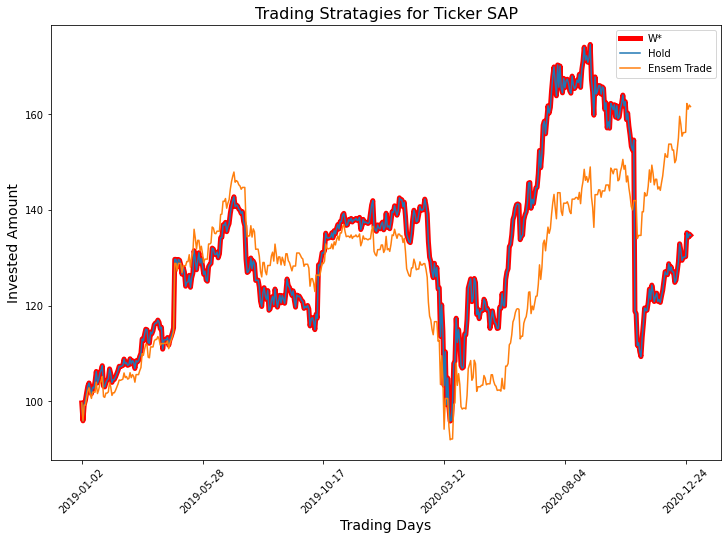

In [103]:
ax = plt.gca()
sap_df.plot(x="Date", y=["W*"], color="red", rot=45, ax=ax, lw=5)
sap_df.plot(x="Date", y=["Hold","Ensem Trade"], figsize=(12,8), rot=45, ax=ax)
plt.xlabel("Trading Days",fontsize = 14)
plt.ylabel("Invested Amount",fontsize = 14)
plt.title("Trading Stratagies for Ticker SAP",fontsize = 16)
plt.show()

### Plotting for SPY

In [104]:
spy_df = spy_l_list4_5[['Date', 'Hold', 'W*', 'Ensem Trade']]

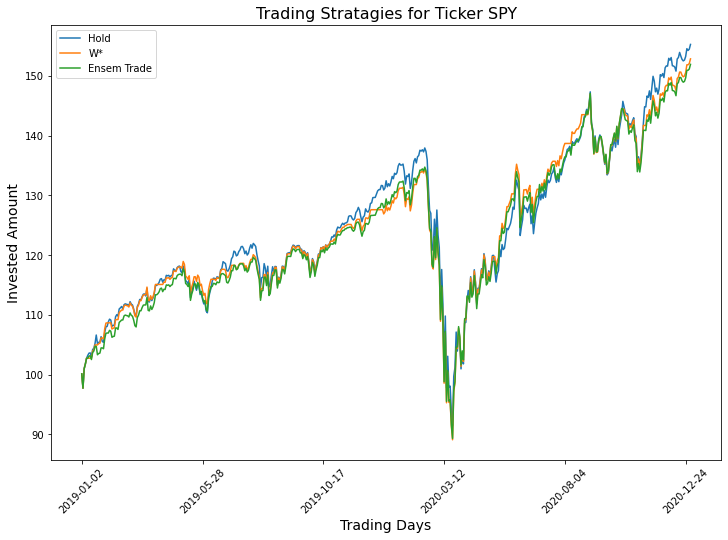

In [105]:
spy_df.plot(x="Date", y=["Hold","W*","Ensem Trade"], figsize=(12,8), rot=45)
plt.xlabel("Trading Days",fontsize = 14)
plt.ylabel("Invested Amount",fontsize = 14)
plt.title("Trading Stratagies for Ticker SPY",fontsize = 16)
plt.show()

### 2. examine your chart. Any patterns?

Do not see a majorly unique pattern apart from the major drop at the start of pandemic.

* **SAP**
    * Hold and W2 gives me excatly similar pattern while trading.
    * Ensemble gives me most profit at the end of trading year.
  
  
* **S&P 500**
    * For S&P 500 the all the 3 stratagies are pretty similar in pattern, although we do see a big dip during the start of pandemic year.

In [106]:
spy_df

,Date,Hold,W*,Ensem Trade
0,2019-01-02,100.104026,100.104026,100.104026
1,2019-01-03,97.715260,97.715260,97.715260
2,2019-01-04,100.988315,100.988315,100.988315
3,2019-01-07,101.784572,101.784572,101.784572
4,2019-01-08,102.740864,102.740864,102.740864
...,...,...,...,...
500,2020-12-24,153.252563,150.576227,149.668204
501,2020-12-28,154.569129,151.869801,150.953977
502,2020-12-29,154.274243,151.869801,150.953977
503,2020-12-30,154.494362,152.086488,151.169358
